<a href="https://colab.research.google.com/github/pinkcoder718/DeepLearning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.DESCR)
# MNIST - Modified National Institute of Standards and Technology database

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
print(mnist.target)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [6]:
X, y = mnist['data'], mnist['target']

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [19]:
some_digit = X.iloc[0]
some_digit_image = np.array(some_digit).reshape(28,28)

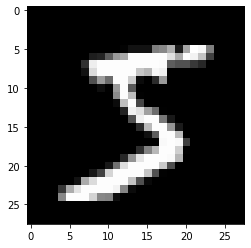

In [33]:
plt.imshow(some_digit_image, cmap = 'gray', interpolation = 'nearest')
plt.axis('on')
plt.show()


In [34]:
print(y[0])

5


In [44]:
y = y.astype(np.uint8)

In [45]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<h2> Binary Classifier</h2>
-> The predicted value is 5 or not

In [46]:
y_train_5 = (y_train == 5) #True for all 5's in Training Set

In [47]:
y_test_5 = (y_test == 5) #Trues for all 5's in Testing set

<h2>SGD Classifier

In [65]:
from sklearn.linear_model import SGDClassifier

In [66]:
sgd_clf = SGDClassifier(random_state = 101, n_jobs = -1)

In [67]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, random_state=101)

In [68]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=uint8)

<h2>RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1)

In [60]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [61]:
rf_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=uint8)

<h2>Performance Evaluation - RF Classifier

In [63]:
pred = rf_clf.predict(X_test)
print(pred)

[7 2 1 ... 4 5 6]


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[ 970    0    0    0    0    3    3    1    3    0]
 [   0 1122    3    4    0    2    2    0    1    1]
 [   6    0  998    7    1    0    4    9    7    0]
 [   0    0    7  980    0    3    0    9    8    3]
 [   2    0    0    0  955    0    5    1    3   16]
 [   4    0    2    7    1  862    4    2    5    5]
 [   4    3    0    1    3    4  941    0    2    0]
 [   1    4   20    1    2    0    0  986    3   11]
 [   4    0    4    9    6    8    3    3  927   10]
 [   6    4    1   13   11    3    1    4    6  960]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96   

<h2>Performance Evaluation - SGD Classifier

In [69]:
pred = sgd_clf.predict(X_test)
print(pred)

[7 2 1 ... 4 5 6]


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[ 952    0    1    4    0   10    4    3    5    1]
 [   1 1064   12    2    0    2    5    3   34   12]
 [   6    3  931   16    9   12    9    9   34    3]
 [   5    0   26  880    3   55    5    7   20    9]
 [   1    1   17    6  899    2    4    8   15   29]
 [   9    3    2   37    8  747   13   13   47   13]
 [  15    2   11    3    7   37  867    1   14    1]
 [   3    1   27    5    6    7    1  944    6   28]
 [   6    6   17   39   12   33    4   11  811   35]
 [   5    3    2   12   25   21    0   65   19  857]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.98      0.94      0.96      1135
           2       0.89      0.90      0.90      1032
           3       0.88      0.87      0.87      1010
           4       0.93      0.92      0.92       982
           5       0.81      0.84      0.82       892
           6       0.95      0.91      0.93       958
           7       0.89      0.92   